# Classification

* Writing formal notation
* Using logistic regression
* Working w/ a confusion matrix
* Understanding multiclass classification

###### Regreesion - is about fitting a curve to data.
The best-fit curve is a function that takes as input a data item and assigns it a number.

* Dealing w/ continuous output.
* Input can be discrete or continuous value.

###### Classification - is about creating a machine-learning model that instead assigns discrete laabels to inputs.

* Supervised-LRN for dealing with discrete output(class).
* Binary classifier - output only two class labels.
* Multicalss classifier - ouput more than two class labels.
* Logistic Regression - a much better classifier than Linear regression.
* Softmax Regression - a multiclass classification. 
    * It's a natural generalization of logistic regression. 
    * Applying SOFTMAX function at the last step.

|類型|優點|缺點|
|---|---|---|
|Linear Regression | 實現簡單| 不保證有效。|
||| 只支援二元標籤。|
|Logistic Regression | 1. 高精準。| 僅支援二元標籤。|
|| 2. 彈性、可加入 Regularize 項調整模型。||
|| 3. 用機率當作模型輸出回應||
|| 4. 對新資料而言，更新模型方便。||
|Softmax Regression | 支援多元標籤。| 實現較為複雜。|
|| 用機率當作模型輸出回應。||

### Measuring Performance of Classification Problems
#### Accuracy 
- for Binary Classifier

    $ accuracy = \frac{\#correct}{\#total} $

#### Precision and Recall
- Confusion Matrix

|||Predicted|Predicted|
|---|---|---|---|
|||√|X|
|Actual|√|TP|FN|
|Actual|X|FP|TN|

|||
|---|---|
| True Positives (TP) | correctly predicted |
| False Positives (FP) | incorrectly predicted |
| Fasle Negative (FN) | incorrectly predicted (predict a positive value as negative) |
| True Negative (TN) | correctly predicted a negative value. |


* Precision 
    * A score of how likely a positive prediction is to BE CORRECT.
    * $precision = \frac{TP}{TP+FP}$ 
    * TP+FP is the total number of all positives.
    * A measure of the prediciont the slgorithm got right.
    * 記法：double P(recision)
* Recall
    * The ratio of true positive found. It's a score of how many true positive WERE successfullt PREDICTED.
    * $recall = \frac{TP}{TP+FN}$
    * A measure of the right things the algorithm identified in the final set.

例：

|||Predicted|Predicted|
|---|---|---|---|
|||貓|狗|
|Actual|貓|TP:30|FN:20|
|Actual|狗|FP:10|TN:40|

問： precision, recall 分別是多少？
答：

$precision = \frac{30}{30+10} = 3/4$ 

$recall = \frac{30}{30+20} = 3/5$

$ accuracy = \frac{30+40}{100} = 70\%$

### Receiver Operating Characteristic Curve (ROC Curve)

- For Binary Classifiers
- A plot that lets you compare the trade-off between false positives and true positives.
- X 軸衡量 FP
- Y 軸衡量 TP
- 衡量多種分類器時，看他們的 ROC 曲線，曲線間不相交者好
- 曲線越高於基本線者，越好
- 如果 Area-under-curve (AUC) 高於 0.9 者，表示是相當好的分類器！
- 隨機亂猜的分類器，其 AUC 約等於 0.5

### Linear Regression for Classification

* 缺點：對於 outliers 非常敏感！因此不是好的分類器。

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


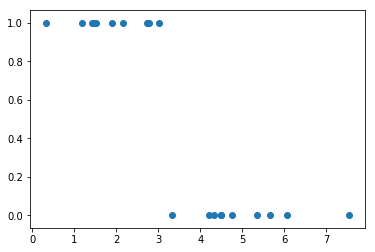

In [2]:
x_zeros = np.random.normal(5, 1, 10)

# Special case: OUTLIER will result this model FAIL
# x_zeros = np.append(np.random.normal(5, 1, 9), 20)

x_ones = np.random.normal(2,1, 10)
x_data = np.append(x_zeros, x_ones)
labels = [0.] * len(x_zeros) + [1.] * len(x_ones)

plt.scatter(x_data, labels)

In [3]:
learning_rate = 0.001
training_epochs = 1000

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# y = w1 * x + w0
def model(X, w):
    return tf.add(tf.multiply(w[1], tf.pow(X,1)),
                 tf.multiply(w[0], tf.pow(X,0)))

w = tf.Variable([0., 0.], name="parameters")
y_model = model(X, w)
cost = tf.reduce_sum(tf.square(Y - y_model))

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [4]:
  sess = tf.Session()
  init = tf.global_variables_initializer()
  sess.run(init)

In [5]:
for epoch in range(training_epochs):
    sess.run(train_op, feed_dict={X: x_data, Y: labels})
    current_cost = sess.run(cost, feed_dict={X: x_data, Y: labels})
    if epoch % 100 == 0:
        print(epoch, current_cost)

w_val = sess.run(w)
print('learned parameters', w_val)


0 8.757183
100 2.649356
200 1.5980402
300 1.4120932
400 1.3792045
500 1.3733877
600 1.3723586
700 1.3721766
800 1.3721447
900 1.3721387
learned parameters [ 1.2864326  -0.22884956]


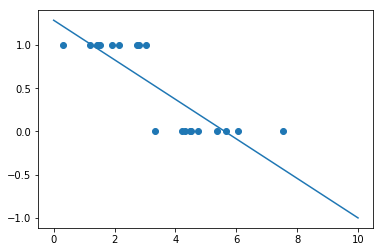

In [20]:
plt.scatter(x_data, labels)

all_xs = np.linspace(0, 10, 100)
plt.plot(all_xs, all_xs*w_val[1] + w_val[0])
plt.show()

In [7]:
# Measuring accuracy

# a positive label - when model's response is > 0.5.
correct_prediction = tf.equal( Y, tf.to_float(tf.greater(y_model, 0.5)))
accuracy = tf.reduce_mean(tf.to_float(correct_prediction))

print("acc:", sess.run(accuracy, feed_dict={X: x_data, Y: labels}))

acc: 0.95


In [8]:
sess.close()